In [1]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

from statsmodels.tsa.holtwinters import ExponentialSmoothing

sys.path.append("..")
from utils import create_onedrive_directdownload

plt.style.use("fivethirtyeight")

In [2]:
# modify the link that we can import the dataset directly through pandas
onedrive_link  = "https://1drv.ms/u/s!AiqdXCxPTydhoogp39Bwl0vnPA-ODQ?e=UMuBAE"
converted_link = create_onedrive_directdownload(onedrive_link)
df = pd.read_csv(converted_link, index_col="Month", skipfooter=2, parse_dates=True, engine="python")
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [3]:
df.columns = ["Sales"]

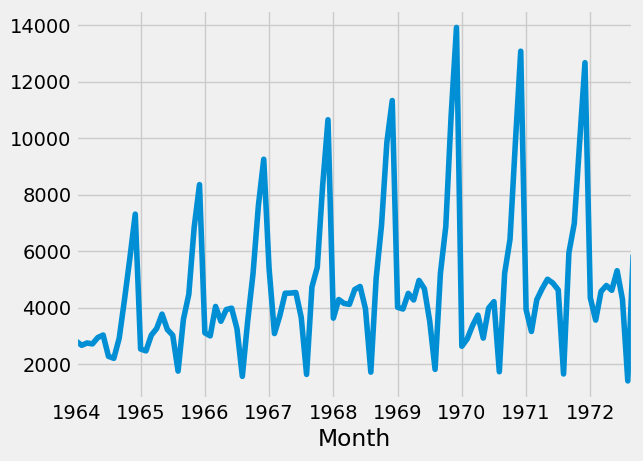

In [4]:
df["Sales"].plot();

In [5]:
df.index.freq = "MS"
Ntest = 12
train = df.iloc[:-Ntest]
test  = df.iloc[-Ntest:]

In [6]:
# boolean series to index df rows
train_idx = df.index <= train.index[-1]
test_idx  = df.index > train.index[-1]

In [7]:
hw = ExponentialSmoothing(
    train["Sales"],
    initialization_method = "legacy-heuristic",
    trend = "add",
    seasonal = "add",
    seasonal_periods = 12
)

res_hw = hw.fit()

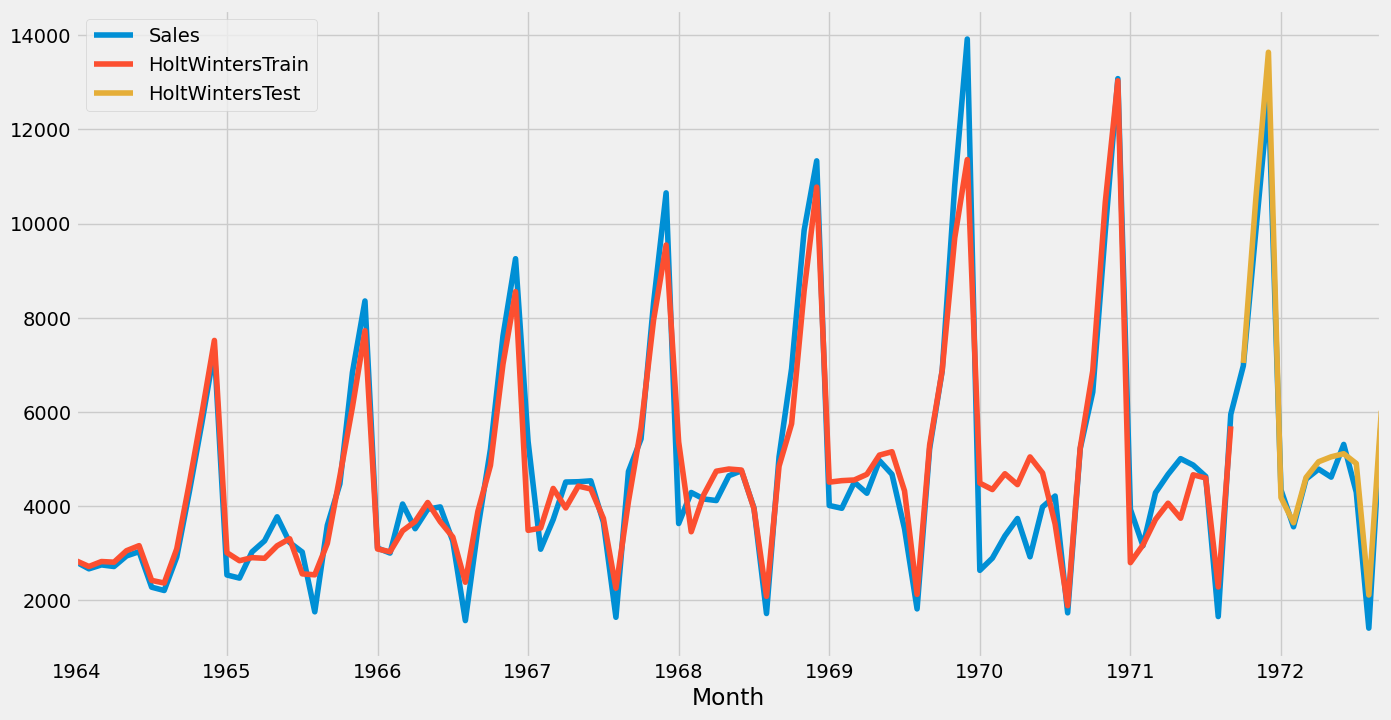

In [8]:
df.loc[train_idx, "HoltWintersTrain"] = res_hw.fittedvalues
df.loc[test_idx, "HoltWintersTest"] = res_hw.forecast(Ntest)


df[["Sales", "HoltWintersTrain", "HoltWintersTest"]].plot(figsize=(15, 8));

In [9]:
r2_score(train["Sales"], res_hw.fittedvalues)

0.9173433418354158

In [10]:
r2_score(test["Sales"], res_hw.forecast(Ntest))

0.9735679986862097